In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


In [5]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [6]:
df=pd.read_csv("data/archive (1)/city_day.csv")

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
df = df[['PM2.5', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].dropna()


In [11]:
df.head()

,PM2.5,NO2,CO,SO2,O3,AQI
28,83.13,28.71,6.93,49.52,59.76,209.0
29,79.84,28.68,13.85,48.49,97.07,328.0
30,94.52,32.66,24.39,67.39,111.33,514.0
31,135.99,42.08,43.48,75.23,102.70,782.0
32,178.33,35.31,54.56,55.04,107.38,914.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22618 entries, 28 to 29530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   22618 non-null  float64
 1   NO2     22618 non-null  float64
 2   CO      22618 non-null  float64
 3   SO2     22618 non-null  float64
 4   O3      22618 non-null  float64
 5   AQI     22618 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


<Axes: >

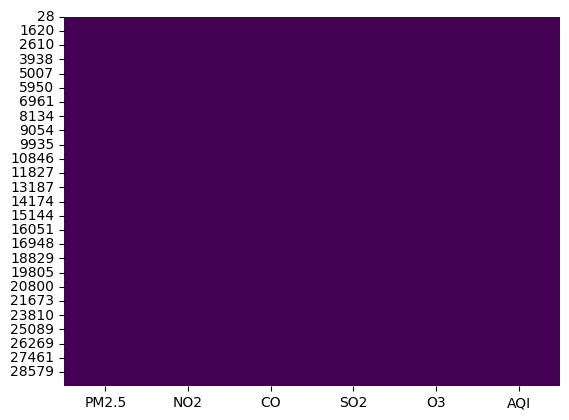

In [13]:
sns.heatmap(df.isnull(),cmap="viridis",cbar=False)

<Axes: >

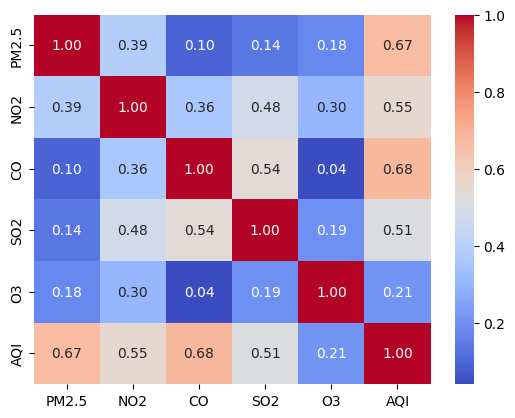

In [14]:
corr= df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [15]:
lr= LinearRegression()
x = df.drop('AQI', axis=1)
y = df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Mean Squared Error: 3200.6305897978136
R^2 Score: 0.8340774940339487
Mean Absolute Error: 32.1811750500209
Training Accuracy: 0.8470951767525855
Testing Accuracy: 0.8340774940339487


In [16]:
rf= RandomForestRegressor(n_estimators=100 , max_depth=6,min_samples_split=2,min_samples_leaf=10)
x = df.drop('AQI', axis=1)
y = df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")

train_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)
print(f"RF Training Accuracy: {train_accuracy}")
print(f"RF Testing Accuracy: {test_accuracy}")


Mean Squared Error: 2070.2600438515124
R^2 Score: 0.8901774561298376
Mean Absolute Error: 25.888077317931238
RF Training Accuracy: 0.9023545303141055
RF Testing Accuracy: 0.8901774561298376


In [17]:
xgbr= XGBRegressor(     n_estimators=1000, 
                    max_depth=8, 
                    learning_rate=0.01, 
                    min_child_weight=1, 
                    subsample=0.7, 
                    colsample_bytree=0.8, 
                    gamma=0.1, 
                    reg_alpha=0.9, 
                    reg_lambda=1)

x = df.drop('AQI', axis=1)
y = df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
xgbr.fit(x_train, y_train)
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

train_accuracy = xgbr.score(x_train, y_train)
test_accuracy = xgbr.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Mean Squared Error: 2149.8609126731053
R^2 Score: 0.8939360369083994
Mean Absolute Error: 23.810910547022058
Training Accuracy: 0.9693882216324102
Testing Accuracy: 0.8939360369083994


In [18]:
cat= CatBoostRegressor(     n_estimators=1000, 
                    max_depth=8, 
                    )

x = df.drop('AQI', axis=1)
y = df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

train_accuracy = cat.score(x_train, y_train)
test_accuracy = cat.score(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Learning rate set to 0.064695
0:	learn: 132.6677614	total: 226ms	remaining: 3m 45s
1:	learn: 125.8984000	total: 255ms	remaining: 2m 7s
2:	learn: 119.8995773	total: 282ms	remaining: 1m 33s
3:	learn: 114.2778040	total: 297ms	remaining: 1m 14s
4:	learn: 108.8293412	total: 314ms	remaining: 1m 2s
5:	learn: 103.9796646	total: 330ms	remaining: 54.7s
6:	learn: 99.2691355	total: 345ms	remaining: 49s
7:	learn: 95.0111197	total: 360ms	remaining: 44.6s
8:	learn: 91.0061790	total: 377ms	remaining: 41.5s
9:	learn: 87.2231962	total: 395ms	remaining: 39.1s
10:	learn: 83.7322576	total: 412ms	remaining: 37.1s
11:	learn: 80.4034979	total: 428ms	remaining: 35.2s
12:	learn: 77.4614219	total: 446ms	remaining: 33.9s
13:	learn: 74.5777689	total: 462ms	remaining: 32.5s
14:	learn: 71.9388566	total: 476ms	remaining: 31.3s
15:	learn: 69.5068143	total: 490ms	remaining: 30.1s
16:	learn: 67.4053212	total: 503ms	remaining: 29.1s
17:	learn: 65.3285998	total: 517ms	remaining: 28.2s
18:	learn: 63.5229708	total: 529ms	re

In [19]:
joblib.dump(cat, 'cat_model.joblib')

['cat_model.joblib']

In [ ]:
import gradio as gr
import joblib

# Load the trained CatBoost model
cat = joblib.load('cat_model.joblib')
# Define a prediction function using the trained CatBoost model
def predict_aqi(pm25, no2, co, so2, o3):
    features = [[pm25, no2, co, so2, o3]]
    pred = cat.predict(features)[0]
    return f"Predicted AQI: {pred:.2f}"

# Custom CSS for a modern look
custom_css = """
.gradio-container {background: linear-gradient(135deg, #ffd21e 0%, #ffcc29 100%);}
h1, h2, h3 {color: #2d3a4b;}
input, .input-text {border-radius: 8px;}
.output-text {font-size: 1.5em; color: #1a5d1a; font-weight: bold;}
"""

# Feature info HTML
feature_info = """
<div style='background: #ffd21e; border-radius: 10px; padding: 18px; margin-bottom: 18px; color: #2d3a4b; font-size: 1.1em;'>
<b>What do these features mean?</b><br><br>
<ul>
    <li><b>PM2.5 (μg/m³):</b> Fine particulate matter. <b>Low:</b> 0-50 (Good), <b>High:</b> 250+ (Hazardous)</li>
    <li><b>NO2 (μg/m³):</b> Nitrogen dioxide. <b>Low:</b> 0-40 (Good), <b>High:</b> 200+ (Very unhealthy)</li>
    <li><b>CO (mg/m³):</b> Carbon monoxide. <b>Low:</b> 0-2 (Good), <b>High:</b> 10+ (Dangerous)</li>
    <li><b>SO2 (μg/m³):</b> Sulfur dioxide. <b>Low:</b> 0-20 (Good), <b>High:</b> 100+ (Very unhealthy)</li>
    <li><b>O3 (μg/m³):</b> Ozone. <b>Low:</b> 0-60 (Good), <b>High:</b> 180+ (Unhealthy)</li>
</ul>
<i>Higher values mean more pollution and worse air quality.</i>
</div>
"""

with gr.Blocks(css=custom_css, title="Air Quality Index Predictor") as demo:
    gr.Markdown("<h1>🌤️ Air Quality Index (AQI) Predictor</h1>")
    gr.Markdown(feature_info)
    with gr.Row():
        with gr.Column():
            pm25 = gr.Number(label="PM2.5 (μg/m³)", value=50.0)
            no2 = gr.Number(label="NO2 (μg/m³)", value=20.0)
            co = gr.Number(label="CO (mg/m³)", value=1.0)
            so2 = gr.Number(label="SO2 (μg/m³)", value=10.0)
            o3 = gr.Number(label="O3 (μg/m³)", value=40.0)
            submit_btn = gr.Button("Predict AQI", elem_id="submit-btn")
        with gr.Column():
            output = gr.Textbox(label="Result", elem_classes="output-text", interactive=False)
    submit_btn.click(
        predict_aqi,
        inputs=[pm25, no2, co, so2, o3],
        outputs=output
    )

demo.launch()

* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.
